In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# importing data

data = pd.read_excel('https://github.com/olzhasshortanbaiuly/PETE601_FinalProject/raw/main/dataset_pete601.xlsx')
data.head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
0,"6,200","2,200","1,000",35,"1,000-3,000","300-1,400",13-14,"1,500-4,000",95,75,20,"33,000","33,000"
1,60,163,62,60,1-5,"1,000-1,800",28-30,2-50,110,45,20,"5,000","1,500"
2,574,376,68,32,"200-2,500","825-1,650",12-13,"2,000-10,000",84-98,60,10,"4,611","4,611"
3,290,95,20,34,"800-1,000","650-1,000",9-10,"11,500-28,000",84,55,10,"1,692","1,692"
4,600,162,147,36,"1,000-3,000","1,000",11-14,"1,000-2,000",95-105,65,20,"3,500","3,500"


In [3]:
# column names

data.columns

Index(['Area, acres', 'Production wells', 'Injection wells', 'Porosity, %',
       'Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F',
       'Initial oil saturation, %', 'End oil saturation, %', 'Tot. prod., b/d',
       'Enh. prod., b/d'],
      dtype='object')

In [4]:
# shape of the data

data.shape

(698, 13)

In [5]:
# dropping the rows with any NaN values
data = data.dropna(axis = 0, how = 'any')
data.shape

(675, 13)

In [6]:
# dropping duplicates

data.drop_duplicates(inplace=True)
data.shape

(651, 13)

In [7]:
for col in data.columns:
  print(col)

Area, acres
Production wells
Injection wells
Porosity, %
Permeability, mD
Depth, ft
Gravity, °API
Oil, cp
Oil, °F
Initial oil saturation, %
End oil saturation, %
Tot. prod., b/d
Enh. prod., b/d


In [8]:
#get the all possible unique values for each of the data columns

for col in data.columns:
  print(col + ' has this unique values: ')
  print(data[col].unique())

Area, acres has this unique values: 
['6,200' '60' '574' '290' '600' '100' '170' '160' '1,230' '15' '50' '66'
 '152' '125' '546' '552' '1,214' '80' '1,200' '1,291' '9,660' '20' '30'
 '90' '94' '3,380' '300' '320' '44' '37' '700' '780' '8,960' '3,500' '5'
 '25' '569' '8,559' '1,100' '2,320' '2,500' '18,000' '3,600' '5,500'
 '1,084' '4,900' '285' '120' '85' '70' '200' '190' '840' '3,398' '8,240'
 '280' '212' '12,600' '4,100' '2,600' '1,800' '10,800' '880' '10,104'
 '1,020' '13,440' '8,500' '1,120' '340' '4,392' '650' '15,699' '500' '480'
 0 '49,900' '1,345' '790' '1,400' '810' '3,400' '10' '1,953' '246' '4,437'
 '2,870' '6,000' '1,600' '1,143' '1,235' '1,179' '1,326' '1,155' '1,280'
 '3,100' '2,090' '12,000' '1,240' '5,700' '1,048' '1,204' '1,160' '1,700'
 '1,780' '27,848' '7,800' '240' '6,183' '2,010' '16,300' '11,000' '7,000'
 '330' '2,084' '1,923' '640' '98' '2,100' '180' '26,000' '55,000' '4,000'
 '10,000' '9,000' '5,000' '6,240' '204' '70,000' '2,400' '40,000' '20,000'
 '14,415' '2,

In [9]:
import re

def process_value(value):
    # If the value is already numeric, return as is
    if isinstance(value, (float, int)):
        return value

    # Convert the value to a string and remove commas and spaces
    value_str = re.sub(r'[, ]+', '', str(value))

    # Replace various dash types with a standard hyphen
    value_str = value_str.replace('–', '-').replace('—', '-')

    # Remove 'ft' or similar units if present
    value_str = re.sub(r'[^\d.-]+', '', value_str)

    # Check if there is a hyphen indicating a range
    if '-' in value_str:
        try:
            # Split the value on hyphen to get the start and end of the range
            start_str, end_str = value_str.split('-')
            # Handle cases like '1,000-5,000+'
            end_str = end_str.rstrip('+')
            # Convert both sides to float and compute the average
            start, end = float(start_str), float(end_str)
            return (start + end) / 2
        except ValueError:
            # If conversion fails, return NaN
            return np.nan

    # Attempt to convert to float if there is no hyphen
    try:
        # Handle cases like '5,000+'
        value_str = value_str.rstrip('+')
        return float(value_str)
    except ValueError:
        # If conversion fails, return NaN
        return np.nan

def process_dataframe_or_column(data, columns=None):
    # If columns are provided, only process those
    if columns is not None:
        for col in columns:
            data[col] = data[col].apply(process_value)
    else:
        # Apply to all columns if no specific columns are provided
        for col in data.columns:
            # Apply only to columns with string type
            if data[col].dtype == object:
                data[col] = data[col].apply(process_value)
    return data

# Apply the processing to the entire dataframe
data = process_dataframe_or_column(data)
data = data.dropna(axis = 0, how = 'any') # drop NaN
data.shape

(650, 13)

In [10]:
# Check the unique values again
for col in data.columns:
    print(col + ' has these unique values: ')
    print(data[col].unique())

Area, acres has these unique values: 
[6.2000e+03 6.0000e+01 5.7400e+02 2.9000e+02 6.0000e+02 1.0000e+02
 1.7000e+02 1.6000e+02 1.2300e+03 1.5000e+01 5.0000e+01 6.6000e+01
 1.5200e+02 1.2500e+02 5.4600e+02 5.5200e+02 1.2140e+03 8.0000e+01
 1.2000e+03 1.2910e+03 9.6600e+03 2.0000e+01 3.0000e+01 9.0000e+01
 9.4000e+01 3.3800e+03 3.0000e+02 3.2000e+02 4.4000e+01 3.7000e+01
 7.0000e+02 7.8000e+02 8.9600e+03 3.5000e+03 5.0000e+00 2.5000e+01
 5.6900e+02 8.5590e+03 1.1000e+03 2.3200e+03 2.5000e+03 1.8000e+04
 3.6000e+03 5.5000e+03 1.0840e+03 4.9000e+03 2.8500e+02 1.2000e+02
 8.5000e+01 7.0000e+01 2.0000e+02 1.9000e+02 8.4000e+02 3.3980e+03
 8.2400e+03 2.8000e+02 2.1200e+02 1.2600e+04 4.1000e+03 2.6000e+03
 1.8000e+03 1.0800e+04 8.8000e+02 1.0104e+04 1.0200e+03 1.3440e+04
 8.5000e+03 1.1200e+03 3.4000e+02 4.3920e+03 6.5000e+02 1.5699e+04
 5.0000e+02 4.8000e+02 0.0000e+00 4.9900e+04 1.3450e+03 7.9000e+02
 1.4000e+03 8.1000e+02 3.4000e+03 1.0000e+01 1.9530e+03 2.4600e+02
 4.4370e+03 2.8700e+03 6

In [11]:
data = data[data['Initial oil saturation, %'] >= 20]
data.shape

(548, 13)

In [12]:
data = data[data['Initial oil saturation, %'] >= data['End oil saturation, %']]
data.shape

(548, 13)

In [13]:
data = data[data['Permeability, mD'] >= 0.1]
data.shape

(522, 13)

In [14]:
data = data[data['Porosity, %'] <= 40]
data.shape

(515, 13)

In [15]:
data[data['Permeability, mD'] >= 0.1].value_counts()

Area, acres  Production wells  Injection wells  Porosity, %  Permeability, mD  Depth, ft  Gravity, °API  Oil, cp  Oil, °F  Initial oil saturation, %  End oil saturation, %  Tot. prod., b/d  Enh. prod., b/d
90.0         45.0              40.0             34.0         850.0             1150.0     15.5           345.0    100.0    80.0                       60.0                   360.0            345.0              2
1255.0       59.0              0.0              27.0         1250.0            2300.0     13.0           825.0    124.0    76.0                       0.0                    9500.0           9500.0             2
320.0        800.0             0.0              37.0         5500.0            1400.0     12.0           3000.0   100.0    65.0                       20.0                   6000.0           4500.0             2
94.0         17.0              17.0             34.0         1250.0            450.0      11.0           20000.0  80.0     85.0                       60.0       

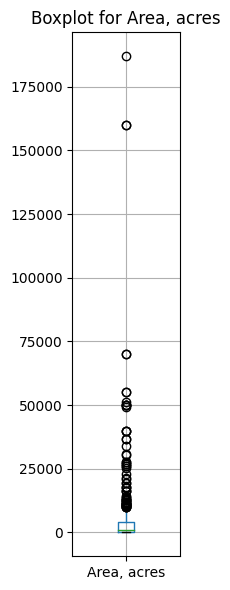

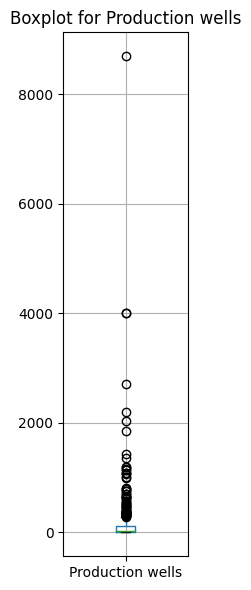

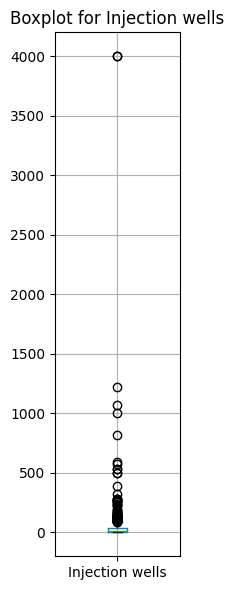

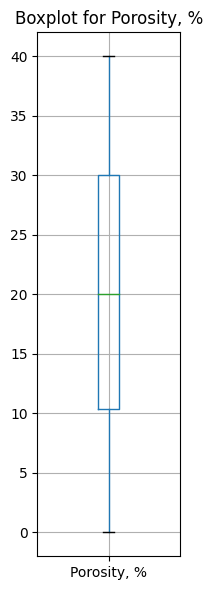

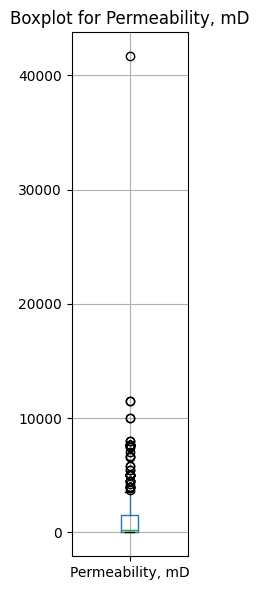

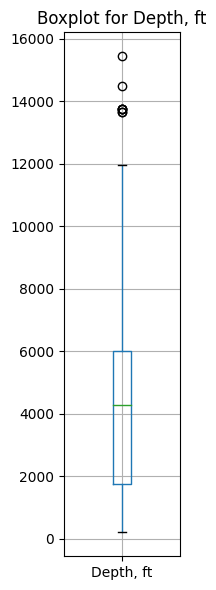

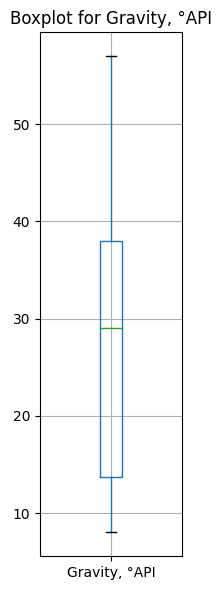

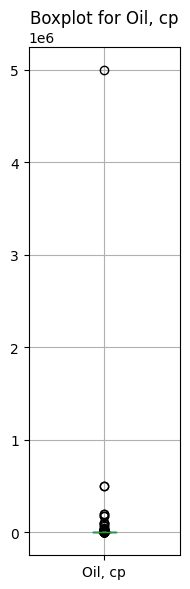

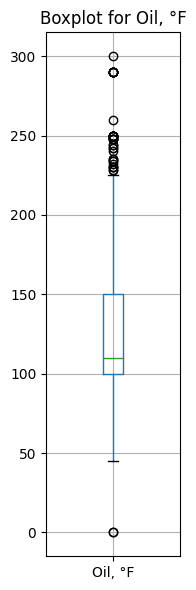

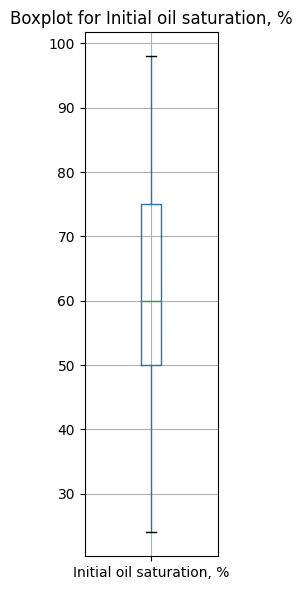

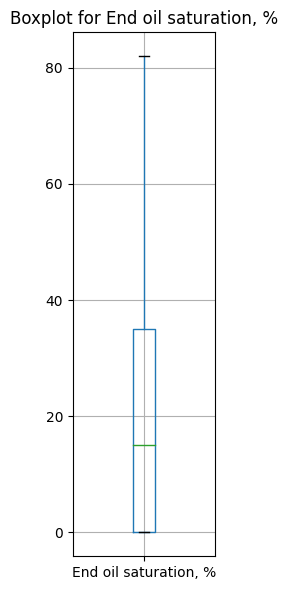

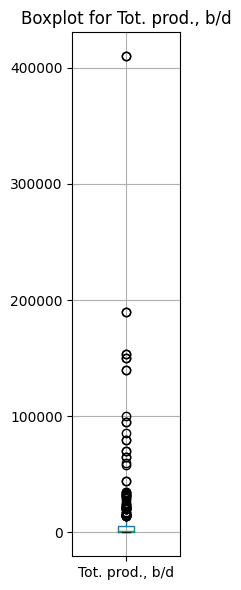

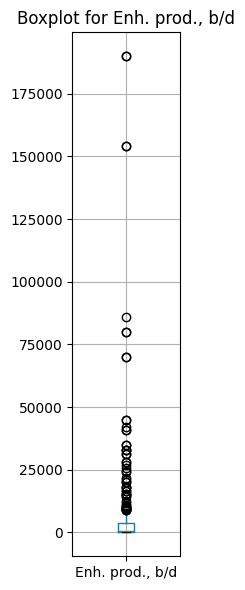

In [16]:
for col in data.columns:
  data[[col]].boxplot(figsize=(2,6))
  plt.title("Boxplot for {}".format(col))
  plt.tight_layout()
  plt.show()

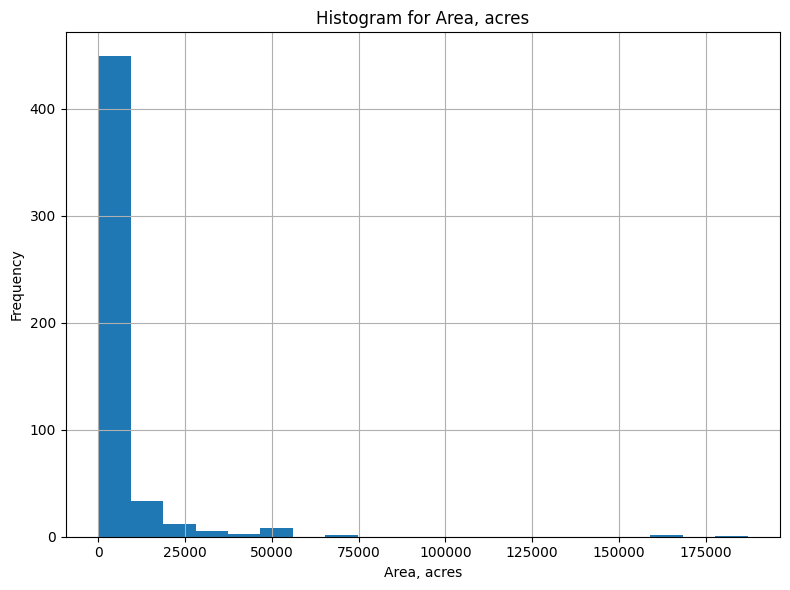

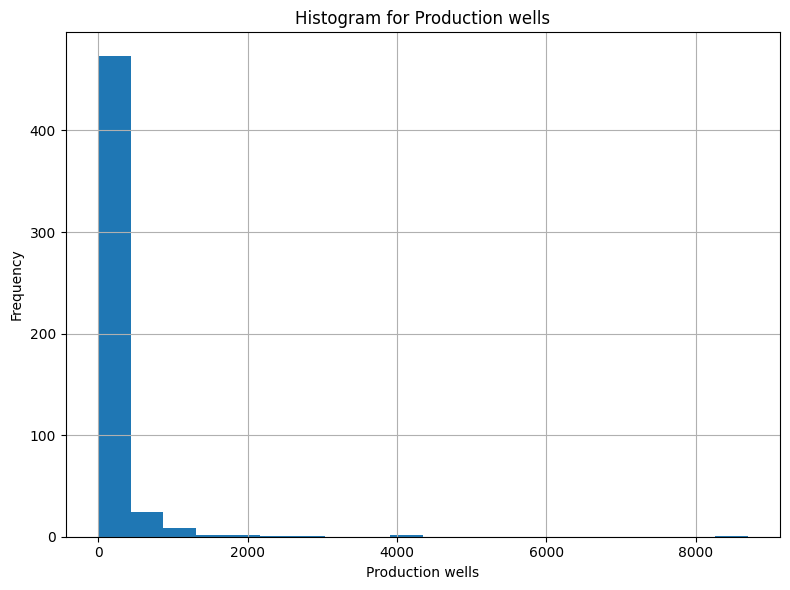

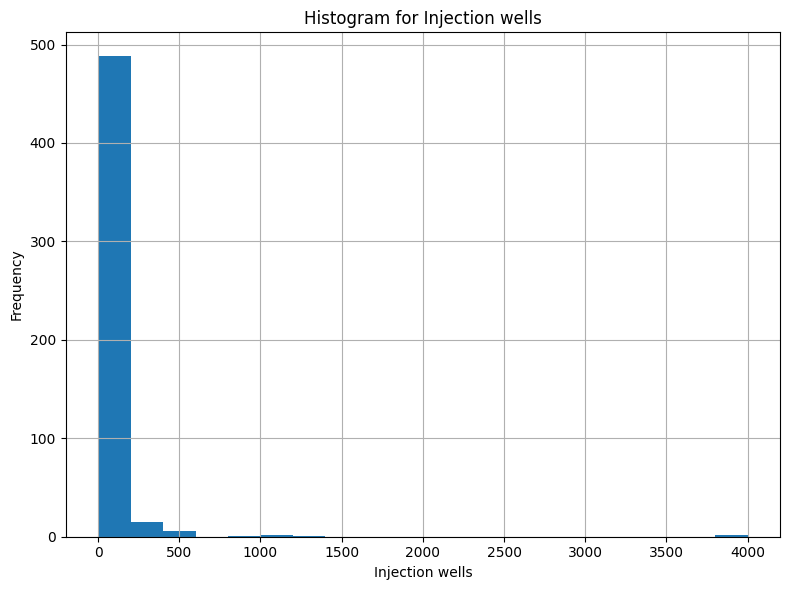

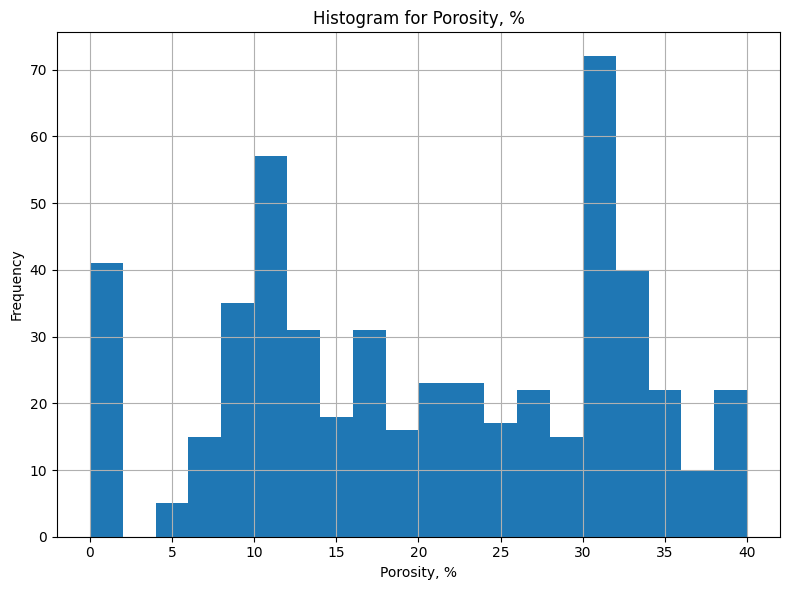

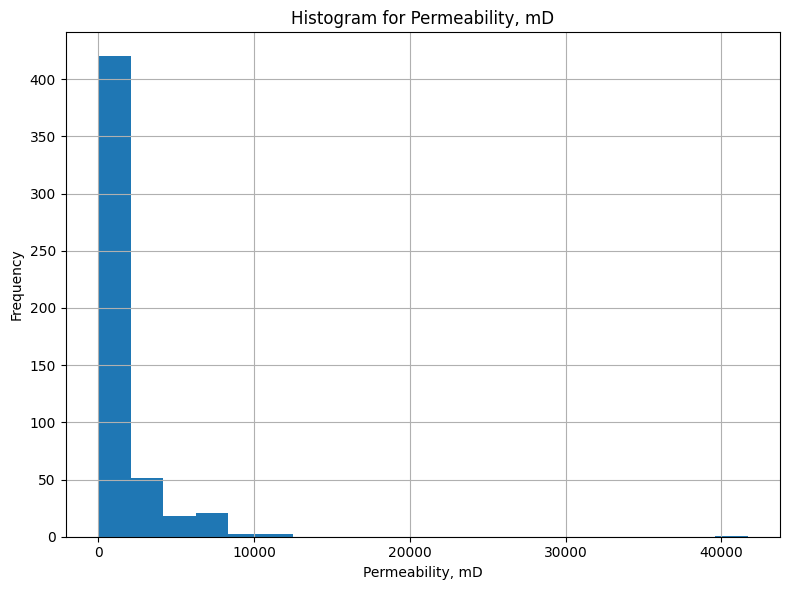

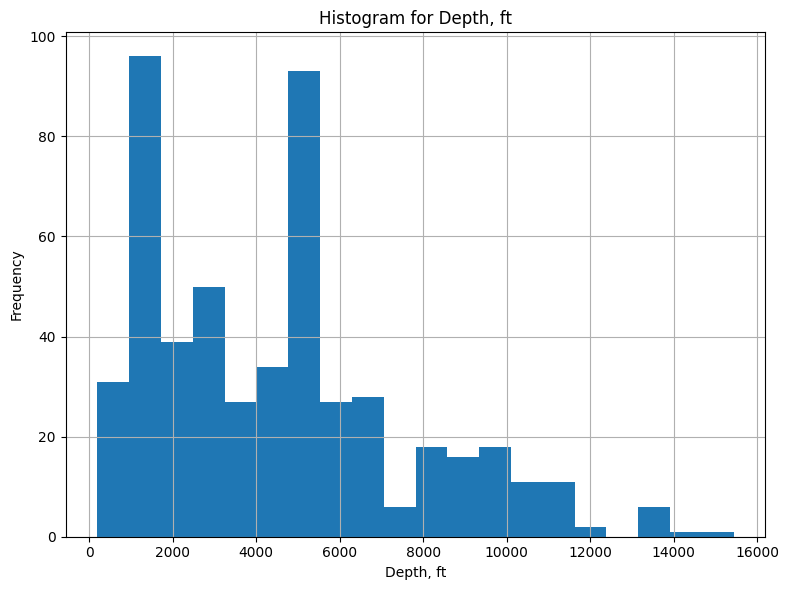

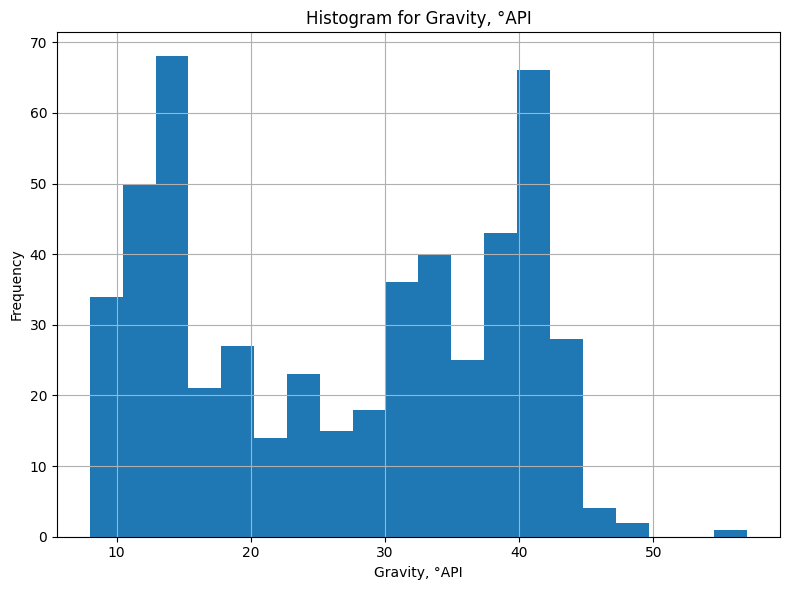

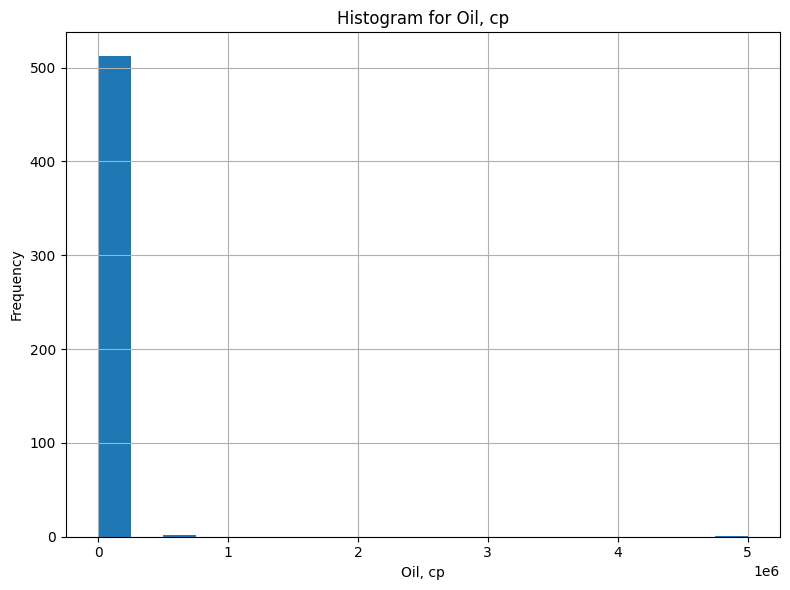

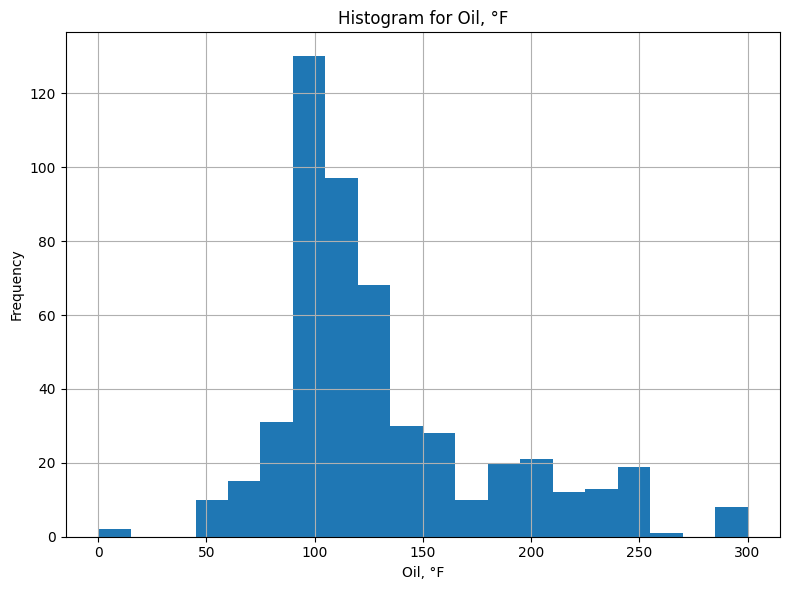

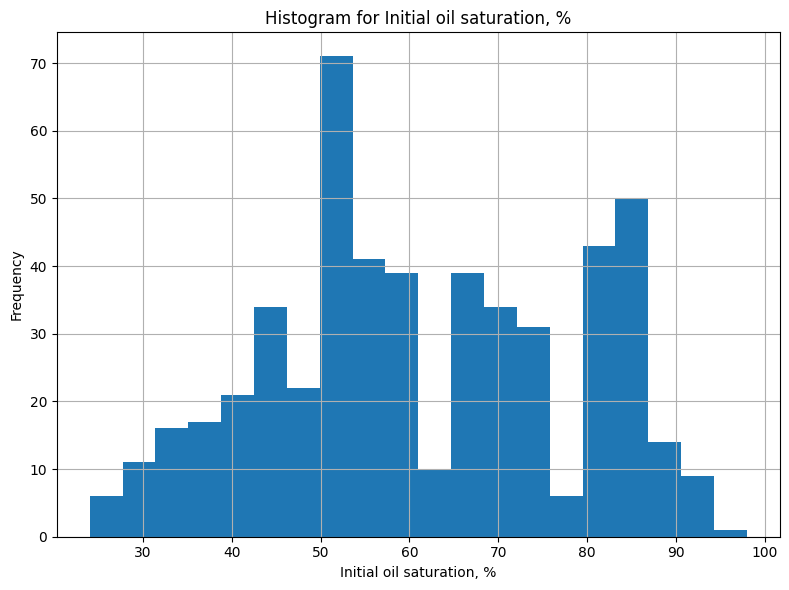

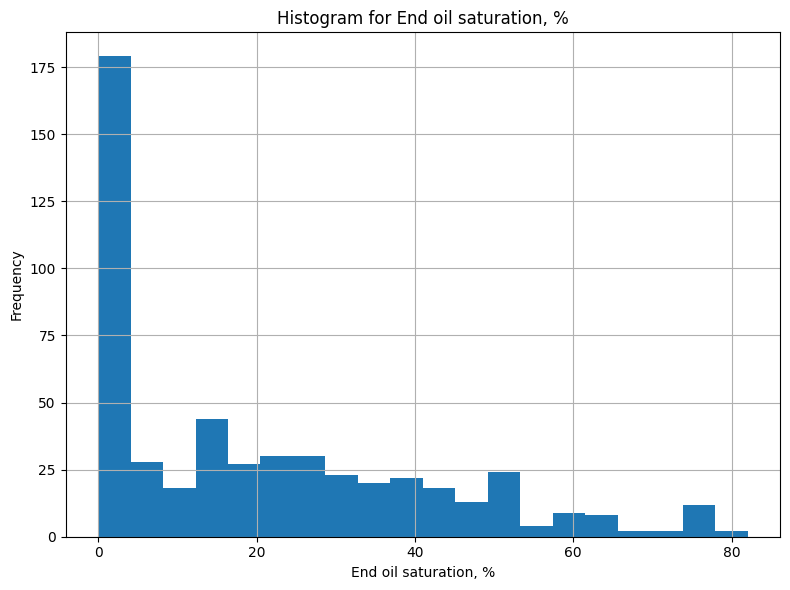

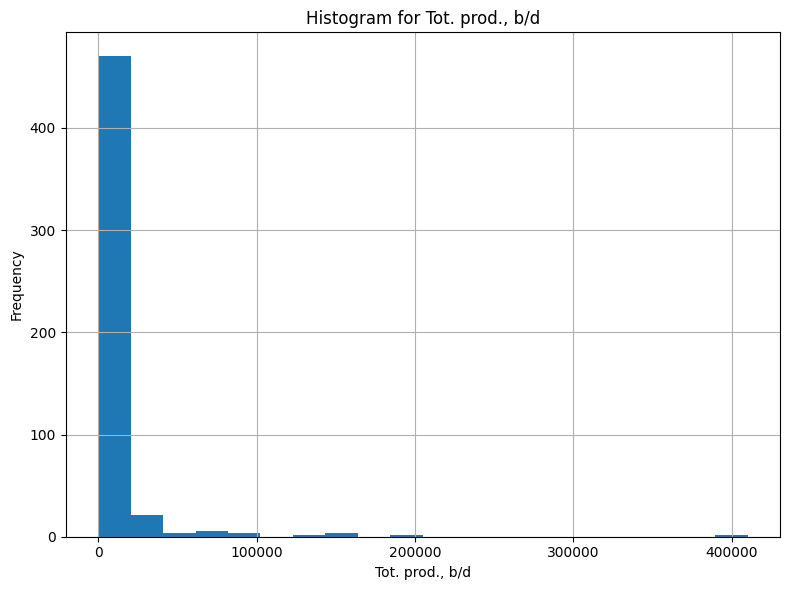

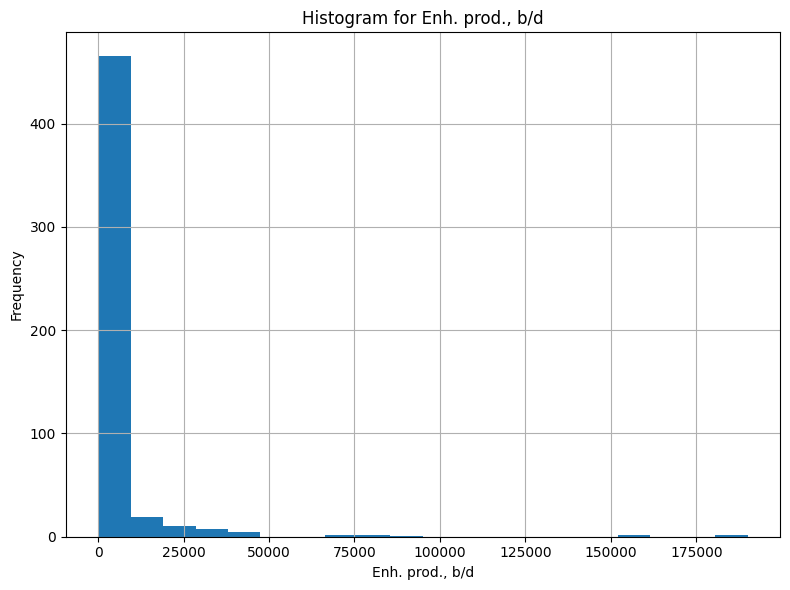

In [17]:
for col in data.columns:
  data[[col]].hist(bins = 20, figsize=(8,6))
  plt.title("Histogram for {}".format(col))
  plt.xlabel("{}".format(col))
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()

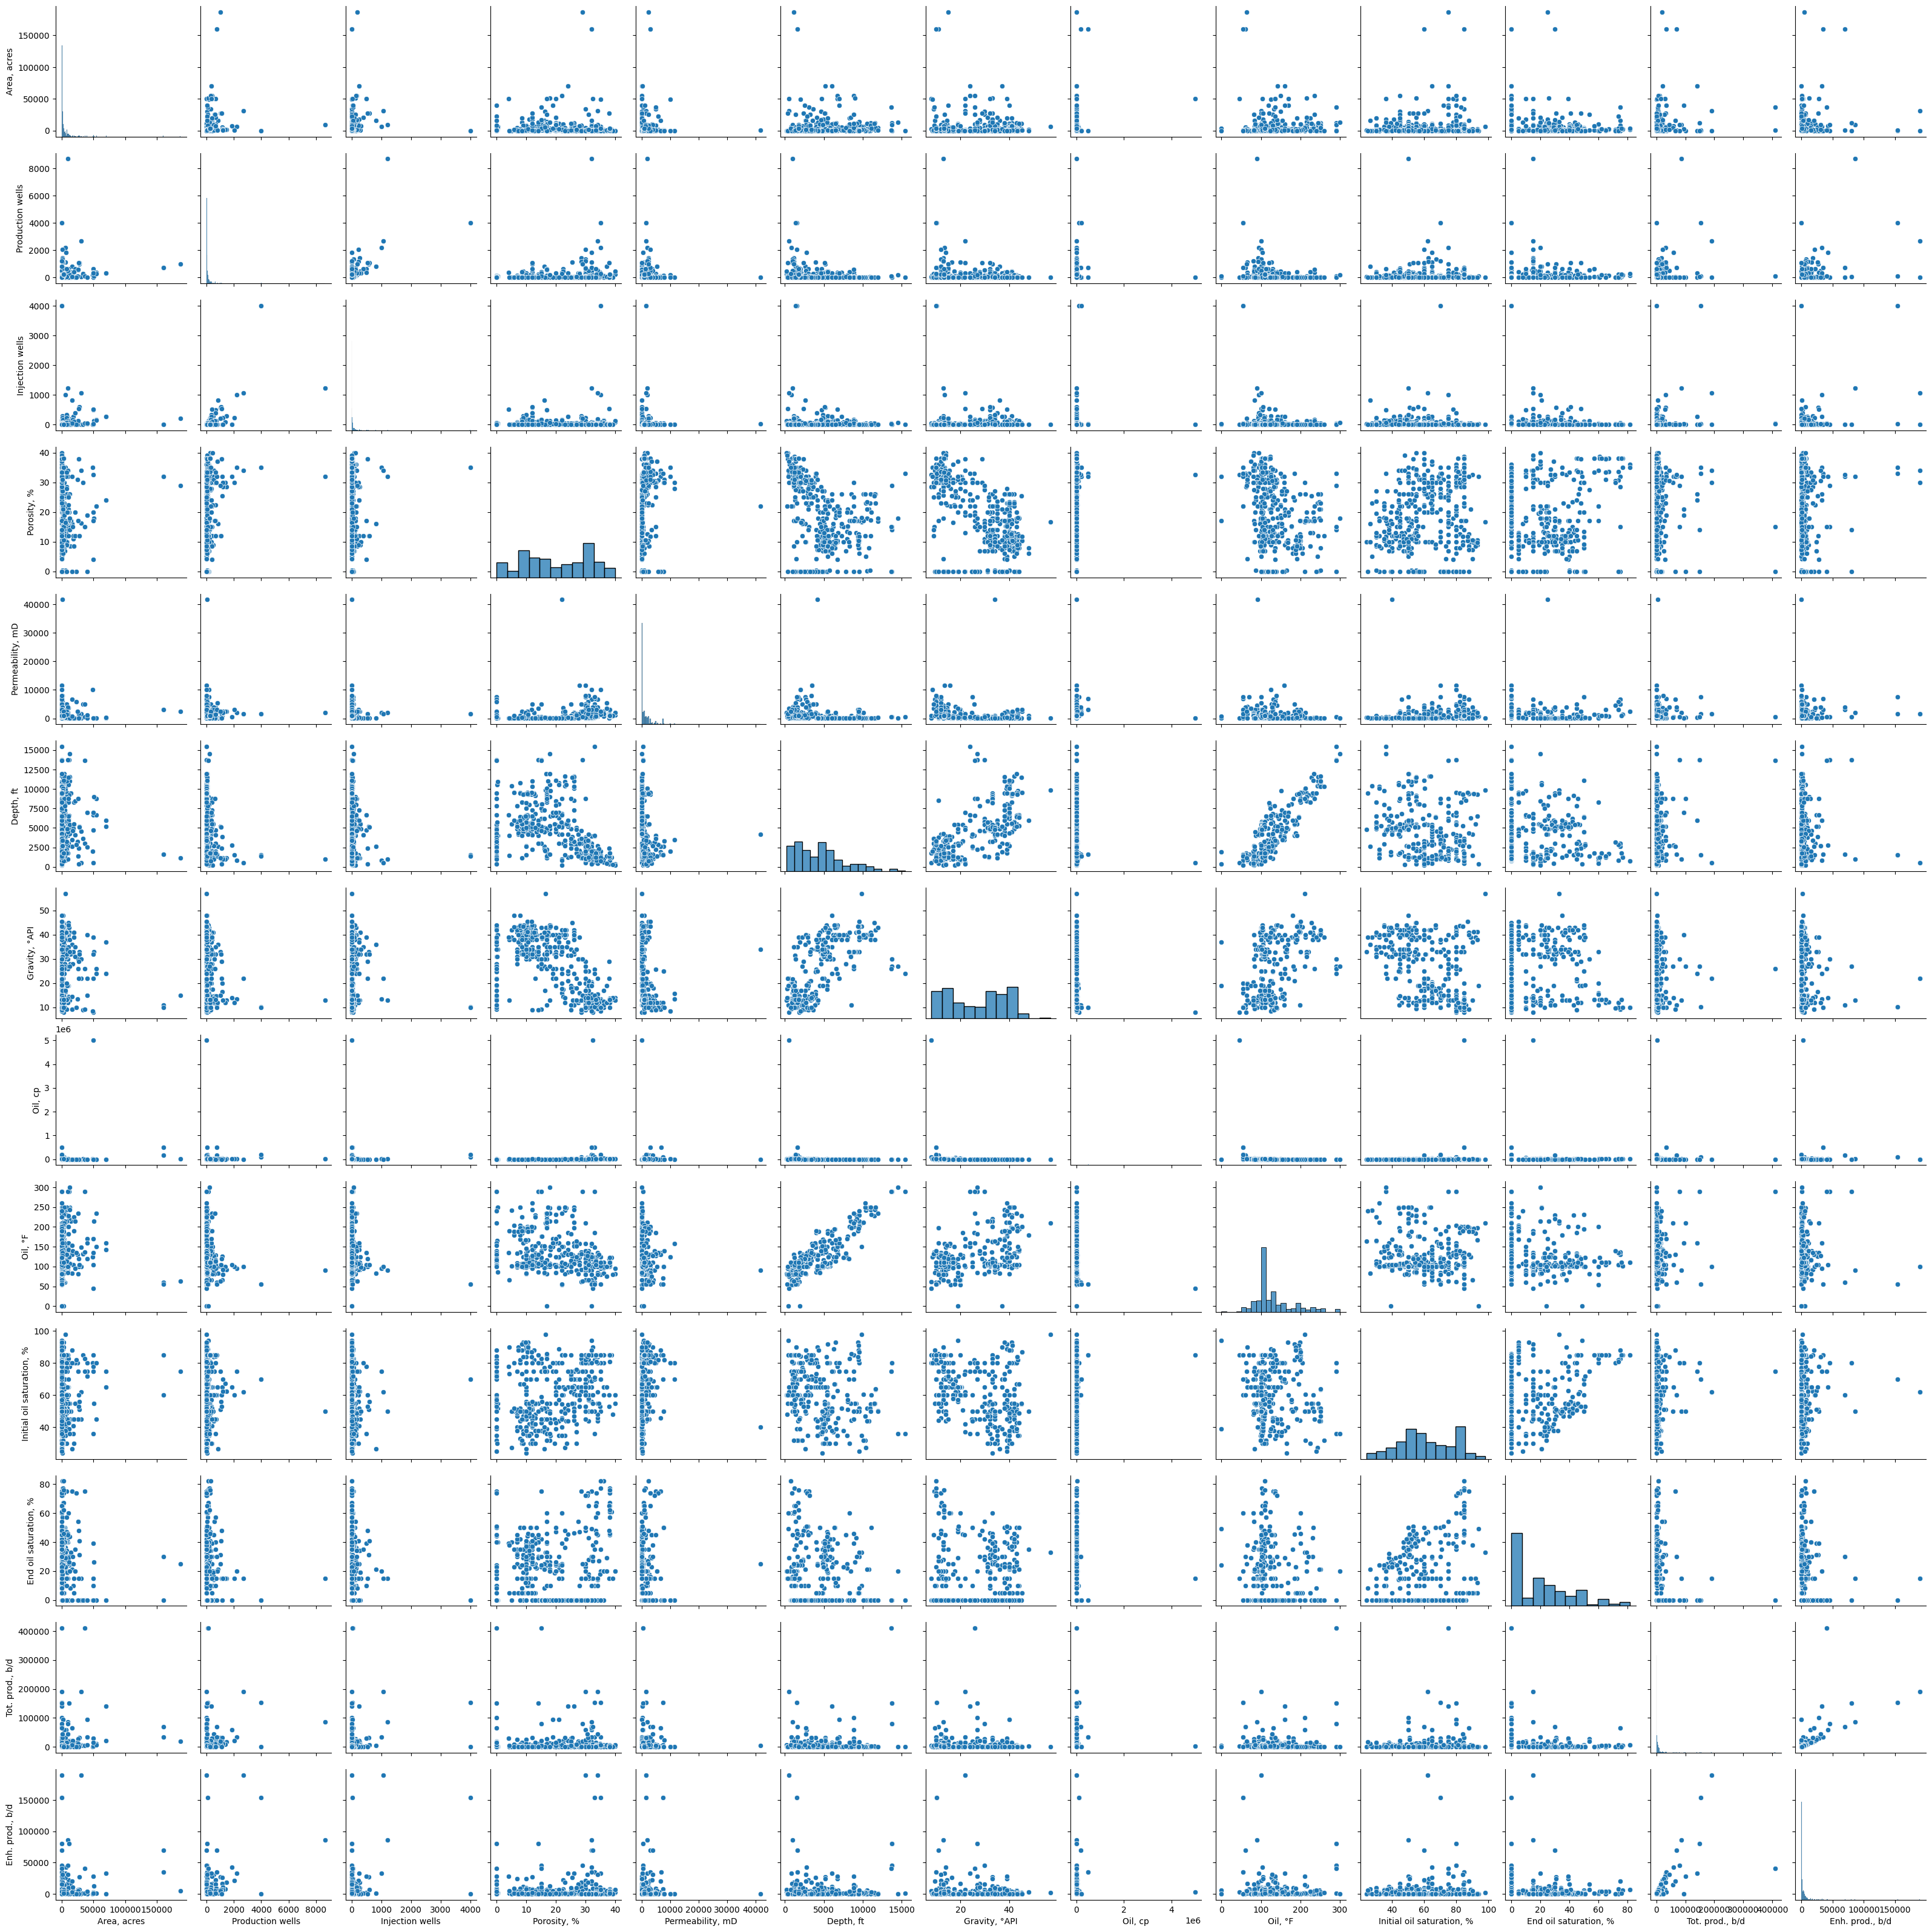

In [ ]:
sns.pairplot(data)

In [18]:
data[data['Area, acres'] >= 150000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
211,160000.0,750.0,0.0,32.0,3000.0,1600.0,11.0,170000.0,60.0,60.0,30.0,70000.0,70000.0
597,160000.0,750.0,0.0,32.0,3000.0,1600.0,10.0,500000.0,55.0,85.0,0.0,35000.0,35000.0
606,187000.0,1000.0,200.0,29.0,2500.0,1150.0,15.0,3000.0,63.0,75.0,25.0,20105.0,5000.0


In [19]:
data[data['Production wells'] >= 3500].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
32,9660.0,8692.0,1219.0,32.0,2000.0,1000.0,13.0,4000.0,90.0,50.0,15.0,86000.0,86000.0
216,0.0,4000.0,4000.0,35.0,1500.0,1509.0,10.2,100000.0,55.0,70.0,0.0,154000.0,154000.0
601,0.0,4000.0,4000.0,35.0,1500.0,1395.0,10.0,200000.0,55.0,70.0,0.0,0.0,0.0


In [20]:
data[data['Injection wells'] >= 3500].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
216,0.0,4000.0,4000.0,35.0,1500.0,1509.0,10.2,100000.0,55.0,70.0,0.0,154000.0,154000.0
601,0.0,4000.0,4000.0,35.0,1500.0,1395.0,10.0,200000.0,55.0,70.0,0.0,0.0,0.0


In [21]:
data[data['Permeability, mD'] >= 35000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
503,1155.0,26.0,16.0,22.0,41675.0,4200.0,34.0,1.5,91.0,40.0,25.0,5090.0,64.0


In [22]:
data[data['Tot. prod., b/d'] >= 35000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
32,9660.0,8692.0,1219.0,32.0,2000.0,1000.0,13.0,4000.00,90.0,50.0,15.0,86000.0,86000.0
158,0.0,0.0,0.0,0.0,400.0,8800.0,27.0,0.90,210.0,50.0,0.0,100000.0,28000.0
167,20.0,3.0,3.0,26.0,275.0,6000.0,24.0,2.00,160.0,75.0,0.0,140000.0,33000.0
169,2400.0,29.0,11.0,21.0,20.0,7000.0,40.0,0.45,160.0,80.0,0.0,95000.0,0.0
211,160000.0,750.0,0.0,32.0,3000.0,1600.0,11.0,170000.00,60.0,60.0,30.0,70000.0,70000.0


In [23]:
data[data['Oil, cp'] >= 4000000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
212,50000.0,3.0,3.0,32.5,5.05,500.0,8.0,5000000.0,45.0,85.0,15.0,2750.0,2750.0


In [24]:
data[data['Enh. prod., b/d'] >= 150000].head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
216,0.0,4000.0,4000.0,35.0,1500.0,1509.0,10.2,100000.0,55.0,70.0,0.0,154000.0,154000.0
282,30878.0,2702.0,1068.0,34.0,1600.0,550.0,22.0,350.0,100.0,62.0,15.0,190000.0,190000.0
600,400.0,102.0,27.0,33.0,7500.0,1509.0,10.2,100000.0,55.0,70.0,0.0,154000.0,154000.0
627,58.0,9.0,1.0,30.0,1600.0,550.0,22.0,350.0,100.0,62.0,15.0,190000.0,190000.0


In [25]:
data.columns

Index(['Area, acres', 'Production wells', 'Injection wells', 'Porosity, %',
       'Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F',
       'Initial oil saturation, %', 'End oil saturation, %', 'Tot. prod., b/d',
       'Enh. prod., b/d'],
      dtype='object')

### Exporting clean dataset

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/PETE 601/dataset_pete601_processed.xlsx'  # specify your path here
data.to_excel(path, index=False)

# Forward-looking ANN

In [26]:
from sklearn.model_selection import train_test_split
import math

Epoch 1/100
13/13 [==============================] - 1s 35ms/step - loss: 956020800.0000 - mean_absolute_error: 8676.4502 - val_loss: 442191552.0000 - val_mean_absolute_error: 6929.9922
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 1098407424.0000 - mean_absolute_error: 8440.4834 - val_loss: 420501472.0000 - val_mean_absolute_error: 6299.6919
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 956410816.0000 - mean_absolute_error: 7942.9844 - val_loss: 411178368.0000 - val_mean_absolute_error: 6092.0596
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 923588480.0000 - mean_absolute_error: 7761.0859 - val_loss: 406461216.0000 - val_mean_absolute_error: 6081.7314
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 900449856.0000 - mean_absolute_error: 7663.7109 - val_loss: 401788032.0000 - val_mean_absolute_error: 6261.0640
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 

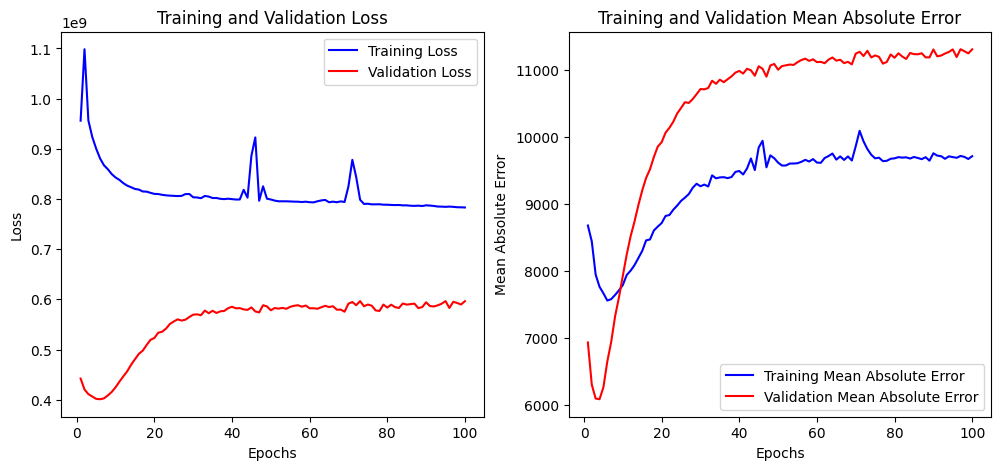

In [27]:
X_ = data[['Area, acres', 'Porosity, %', 'Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F', 'Initial oil saturation, %', 'End oil saturation, %']]
y_ = data[['Tot. prod., b/d', 'Enh. prod., b/d']]

# Splitting the data: 80% for training, 10% for validation, 10% for testing
X_train_, X_temp_, y_train_, y_temp_ = train_test_split(X_, y_, test_size=0.2, random_state=42)
X_val_, X_test_, y_val_, y_test_ = train_test_split(X_temp_, y_temp_, test_size=0.5, random_state=42)

# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
              metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history = model.fit(X_train_, y_train_, epochs=100, batch_size=32, validation_data=(X_val_, y_val_))

# Plotting
loss_ = history.history['loss']
val_loss_ = history.history['val_loss']
metric_ = history.history['mean_absolute_error']
val_metric_ = history.history['val_mean_absolute_error']
epochs = range(1, len(loss_) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_, 'b-', label='Training Loss')
plt.plot(epochs, val_loss_, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs, metric_, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs, val_metric_, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [28]:
model.evaluate(X_test_, y_test_)

2/2 [==============================] - 0s 7ms/step - loss: 121674656.0000 - mean_absolute_error: 6084.4116


[121674656.0, 6084.41162109375]

In [29]:
def normalize_column(column):
    """Normalize a Pandas series using min-max scaling."""
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Normalize each column in the dataframe
data = data.apply(normalize_column)
data.head()

,"Area, acres",Production wells,Injection wells,"Porosity, %","Permeability, mD","Depth, ft","Gravity, °API","Oil, cp","Oil, °F","Initial oil saturation, %","End oil saturation, %","Tot. prod., b/d","Enh. prod., b/d"
0,0.033155,0.253106,0.25000,0.875,0.047956,0.042651,0.112245,0.00055,0.316667,0.689189,0.243902,0.080488,0.173684
2,0.003070,0.043258,0.01700,0.800,0.032359,0.068077,0.091837,0.00120,0.303333,0.486486,0.121951,0.011246,0.024268
3,0.001551,0.010930,0.00500,0.850,0.021560,0.041010,0.030612,0.00395,0.280000,0.418919,0.121951,0.004127,0.008905
4,0.003209,0.018638,0.03675,0.900,0.047956,0.052493,0.091837,0.00030,0.333333,0.554054,0.243902,0.008537,0.018421
5,0.000535,0.028302,0.02150,1.000,0.027559,0.009843,0.122449,0.00055,0.316667,0.418919,0.243902,0.005366,0.011579


Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 0.0206 - mean_absolute_error: 0.0953 - val_loss: 0.0071 - val_mean_absolute_error: 0.0638
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0599 - val_loss: 0.0043 - val_mean_absolute_error: 0.0402
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0481 - val_loss: 0.0044 - val_mean_absolute_error: 0.0465
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0468 - val_loss: 0.0040 - val_mean_absolute_error: 0.0419
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0440 - val_loss: 0.0038 - val_mean_absolute_error: 0.0401
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0425 - val_loss: 0.0036 - val_mean_absolute_error: 0.0373
Epoch 7/100
13/13 [==

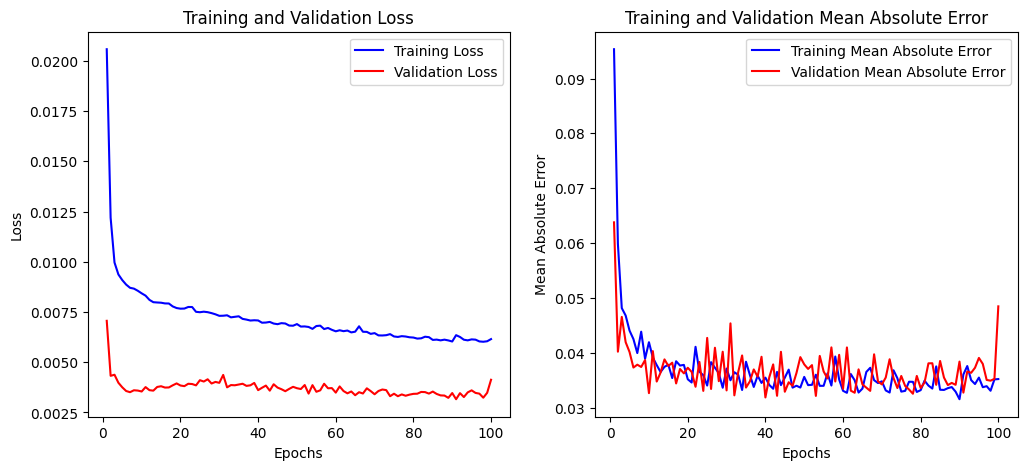

In [30]:
X = data[['Area, acres', 'Porosity, %', 'Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F', 'Initial oil saturation, %', 'End oil saturation, %']]
y = data[['Tot. prod., b/d', 'Enh. prod., b/d']]

# Splitting the data: 80% for training, 10% for validation, 10% for testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Defining the model
forward_model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
forward_model.compile(optimizer='adam',
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward = forward_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss = history_forward.history['loss']
val_loss = history_forward.history['val_loss']
metric = history_forward.history['mean_absolute_error']
val_metric = history_forward.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs, metric, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs, val_metric, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [31]:
forward_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0426


[0.0030757314525544643, 0.042648594826459885]

In [32]:
forward_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 60)                600       
                                                                 
 dense_3 (Dense)             (None, 2)                 122       
                                                                 
Total params: 722 (2.82 KB)
Trainable params: 722 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model with decreased learning rate

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0817 - val_loss: 0.0102 - val_mean_absolute_error: 0.0719
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0704 - val_loss: 0.0086 - val_mean_absolute_error: 0.0668
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0597 - val_loss: 0.0070 - val_mean_absolute_error: 0.0566
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0532 - val_loss: 0.0063 - val_mean_absolute_error: 0.0539
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0506 - val_loss: 0.0058 - val_mean_absolute_error: 0.0506
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0467 - val_loss: 0.0054 - val_mean_absolute_error: 0.0465
Epoch 7/100
13/13 [==

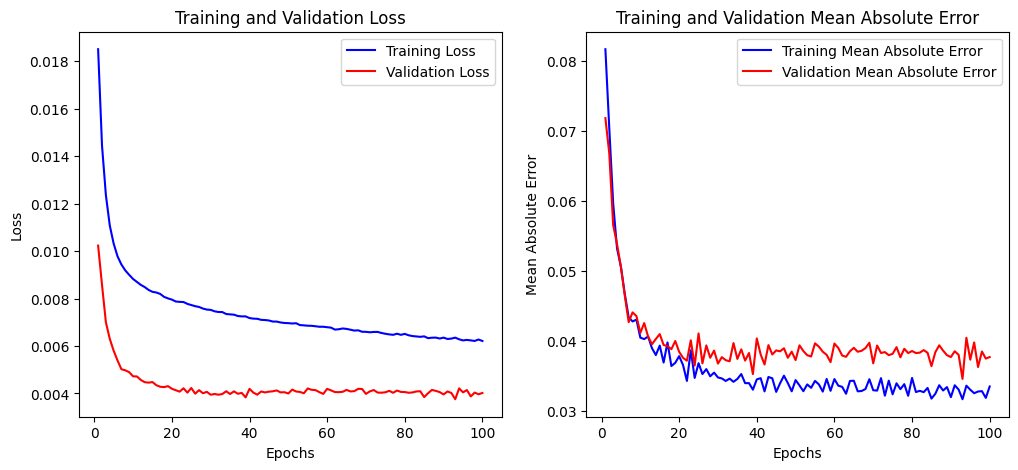

In [33]:
from tensorflow.keras.optimizers import Adam

# Defining the model
forward_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer = Adam(learning_rate=0.0005)
forward_model1.compile(optimizer=optimizer,
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward1 = forward_model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss1 = history_forward1.history['loss']
val_loss1 = history_forward1.history['val_loss']
metric1 = history_forward1.history['mean_absolute_error']
val_metric1 = history_forward1.history['val_mean_absolute_error']
epochs1 = range(1, len(loss1) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs1, loss1, 'b-', label='Training Loss')
plt.plot(epochs1, val_loss1, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs1, metric1, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs1, val_metric1, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [34]:
forward_model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - mean_absolute_error: 0.0273


[0.0021216184832155704, 0.02728894166648388]

## Model with increased learning rate

Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 0.0144 - mean_absolute_error: 0.0681 - val_loss: 0.0062 - val_mean_absolute_error: 0.0554
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0502 - val_loss: 0.0049 - val_mean_absolute_error: 0.0494
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0409 - val_loss: 0.0044 - val_mean_absolute_error: 0.0441
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0407 - val_loss: 0.0040 - val_mean_absolute_error: 0.0420
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0438 - val_loss: 0.0040 - val_mean_absolute_error: 0.0351
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0414 - val_loss: 0.0042 - val_mean_absolute_error: 0.0365
Epoch 7/100
13/13 [==

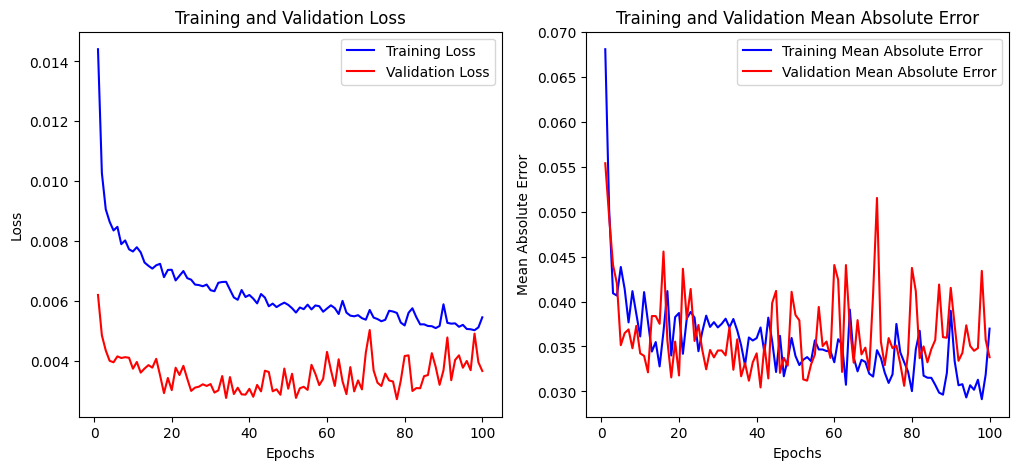

In [35]:
from tensorflow.keras.optimizers import Adam

# Defining the model
forward_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer2 = Adam(learning_rate=0.005)
forward_model2.compile(optimizer=optimizer2,
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward2 = forward_model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss2 = history_forward2.history['loss']
val_loss2 = history_forward2.history['val_loss']
metric2 = history_forward2.history['mean_absolute_error']
val_metric2 = history_forward2.history['val_mean_absolute_error']
epochs2 = range(1, len(loss2) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs2, loss2, 'b-', label='Training Loss')
plt.plot(epochs2, val_loss2, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs2, metric2, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs2, val_metric2, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [36]:
forward_model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0241


[0.0023816791363060474, 0.02410089783370495]

## With Dropout Layer

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 0.0350 - mean_absolute_error: 0.1423 - val_loss: 0.0100 - val_mean_absolute_error: 0.0701
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.1077 - val_loss: 0.0086 - val_mean_absolute_error: 0.0666
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.1071 - val_loss: 0.0070 - val_mean_absolute_error: 0.0543
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0201 - mean_absolute_error: 0.0977 - val_loss: 0.0064 - val_mean_absolute_error: 0.0536
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0876 - val_loss: 0.0057 - val_mean_absolute_error: 0.0465
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0813 - val_loss: 0.0052 - val_mean_absolute_error: 0.0441
Epoch 7/100
13/13 [==

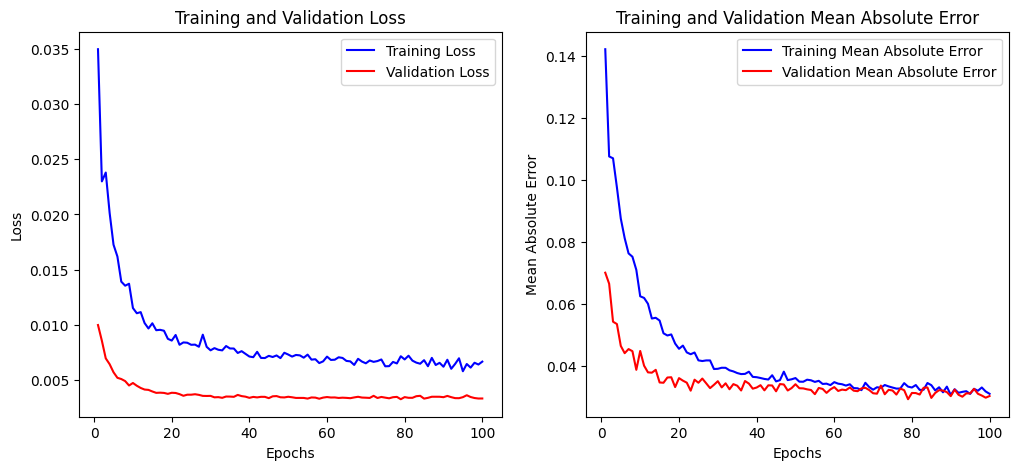

In [37]:
# Defining the model
forward_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3), # Adding a dropout layer with a 30% dropout rate
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
forward_model3.compile(optimizer='adam',
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward3 = forward_model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss3 = history_forward3.history['loss']
val_loss3 = history_forward3.history['val_loss']
metric3 = history_forward3.history['mean_absolute_error']
val_metric3 = history_forward3.history['val_mean_absolute_error']
epochs3 = range(1, len(loss3) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs3, loss3, 'b-', label='Training Loss')
plt.plot(epochs3, val_loss3, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs3, metric3, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs3, val_metric3, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [38]:
forward_model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - mean_absolute_error: 0.0219


[0.0019352436065673828, 0.021927352994680405]

## With Additional Hidden Layer

Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 0.0126 - mean_absolute_error: 0.0650 - val_loss: 0.0059 - val_mean_absolute_error: 0.0571
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0470 - val_loss: 0.0043 - val_mean_absolute_error: 0.0402
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0379 - val_loss: 0.0040 - val_mean_absolute_error: 0.0431
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0393 - val_loss: 0.0039 - val_mean_absolute_error: 0.0357
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0385 - val_loss: 0.0040 - val_mean_absolute_error: 0.0350
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0371 - val_loss: 0.0042 - val_mean_absolute_error: 0.0400
Epoch 7/100
13/13 [==

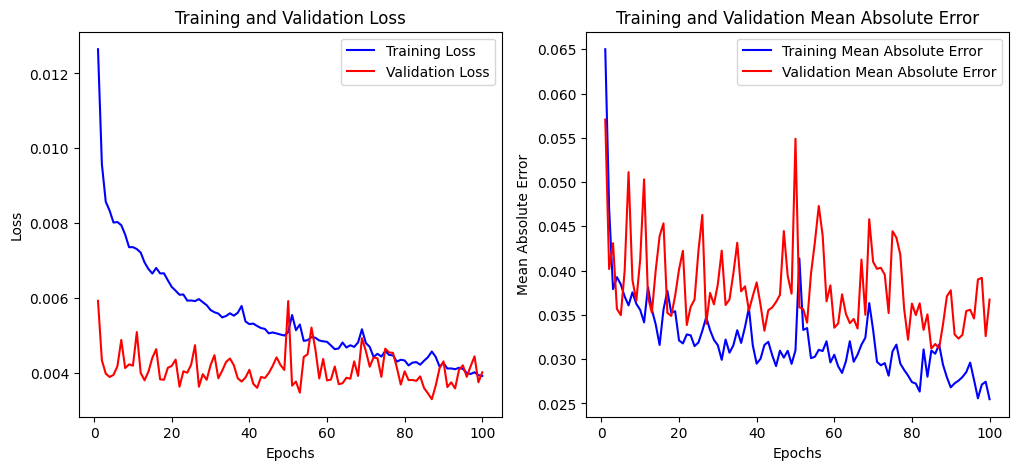

In [39]:
# Defining the model
forward_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(9,), activation=tf.nn.relu),
    tf.keras.layers.Dense(60, activation=tf.nn.relu), # Adding an additional dense layer
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
forward_model4.compile(optimizer='adam',
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_forward4 = forward_model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plotting
loss4 = history_forward4.history['loss']
val_loss4 = history_forward4.history['val_loss']
metric4 = history_forward4.history['mean_absolute_error']
val_metric4 = history_forward4.history['val_mean_absolute_error']
epochs4 = range(1, len(loss4) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs4, loss4, 'b-', label='Training Loss')
plt.plot(epochs4, val_loss4, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs4, metric4, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs4, val_metric4, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [40]:
forward_model4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0239


[0.002651661168783903, 0.02389891818165779]

# Inverse design ANN

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.0222 - mean_absolute_error: 0.1164 - val_loss: 0.0073 - val_mean_absolute_error: 0.0558
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0592 - val_loss: 0.0043 - val_mean_absolute_error: 0.0457
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0420 - val_loss: 0.0021 - val_mean_absolute_error: 0.0312
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0333 - val_loss: 0.0017 - val_mean_absolute_error: 0.0255
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0277 - val_loss: 0.0015 - val_mean_absolute_error: 0.0215
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0259 - val_loss: 0.0014 - val_mean_absolute_error: 0.0223
Epoch 7/100
13/13 [==

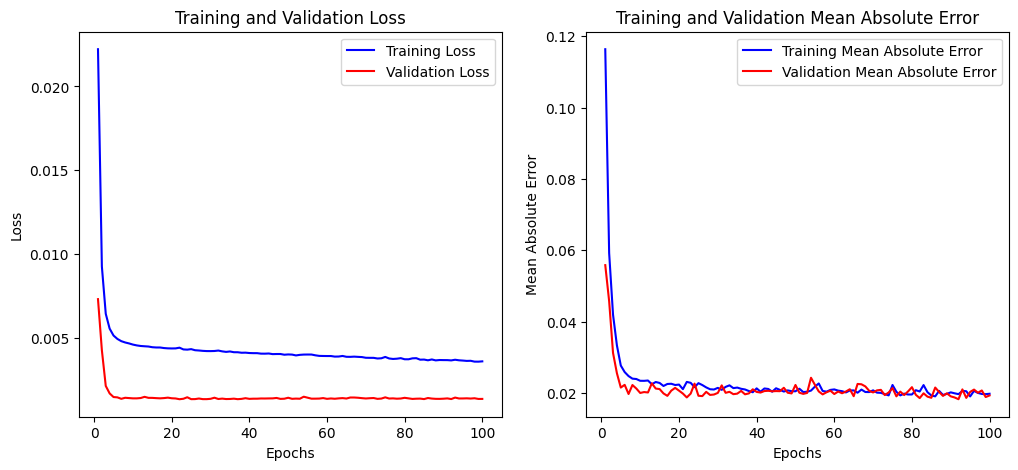

In [41]:
X2 = data[['Area, acres', 'Permeability, mD', 'Depth, ft', 'Gravity, °API', 'Oil, cp', 'Oil, °F', 'Initial oil saturation, %', 'End oil saturation, %']]
y2 = data[['Production wells', 'Injection wells']]

# Splitting the data: 80% for training, 10% for validation, 10% for testing
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

# Defining the model
inverse_model = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(8,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
inverse_model.compile(optimizer='adam',
                      loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse = inverse_model.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss5 = history_inverse.history['loss']
val_loss5 = history_inverse.history['val_loss']
metric5 = history_inverse.history['mean_absolute_error']
val_metric5 = history_inverse.history['val_mean_absolute_error']
epochs5 = range(1, len(loss5) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs5, loss5, 'b-', label='Training Loss')
plt.plot(epochs5, val_loss5, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs5, metric5, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs5, val_metric5, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [42]:
inverse_model.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 8ms/step - loss: 4.8137e-04 - mean_absolute_error: 0.0159


[0.0004813694686163217, 0.015855250880122185]

## Model with increased learning rate

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0787 - val_loss: 0.0114 - val_mean_absolute_error: 0.0662
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0600 - val_loss: 0.0075 - val_mean_absolute_error: 0.0545
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0504 - val_loss: 0.0054 - val_mean_absolute_error: 0.0465
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0418 - val_loss: 0.0043 - val_mean_absolute_error: 0.0412
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0364 - val_loss: 0.0034 - val_mean_absolute_error: 0.0362
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0329 - val_loss: 0.0028 - val_mean_absolute_error: 0.0322
Epoch 7/100
13/13 [==

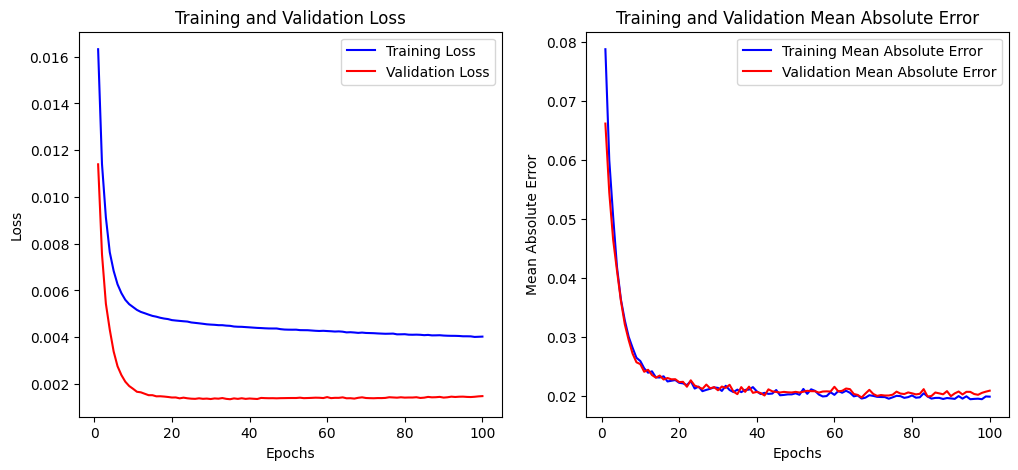

In [43]:
# Defining the model
inverse_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(8,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer = Adam(learning_rate=0.0005)
inverse_model1.compile(optimizer=optimizer,
                       loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse1 = inverse_model1.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss6 = history_inverse1.history['loss']
val_loss6 = history_inverse1.history['val_loss']
metric6 = history_inverse1.history['mean_absolute_error']
val_metric6 = history_inverse1.history['val_mean_absolute_error']
epochs6 = range(1, len(loss6) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs6, loss6, 'b-', label='Training Loss')
plt.plot(epochs6, val_loss6, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs6, metric6, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs6, val_metric6, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [44]:
inverse_model1.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 8ms/step - loss: 5.2142e-04 - mean_absolute_error: 0.0168


[0.0005214200937189162, 0.016826452687382698]

## Model with decreased learning rate

Epoch 1/100
13/13 [==============================] - 1s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0473 - val_loss: 0.0021 - val_mean_absolute_error: 0.0277
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0305 - val_loss: 0.0017 - val_mean_absolute_error: 0.0272
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0286 - val_loss: 0.0017 - val_mean_absolute_error: 0.0234
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0258 - val_loss: 0.0016 - val_mean_absolute_error: 0.0235
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0248 - val_loss: 0.0015 - val_mean_absolute_error: 0.0240
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0262 - val_loss: 0.0014 - val_mean_absolute_error: 0.0213
Epoch 7/100
13/13 [==

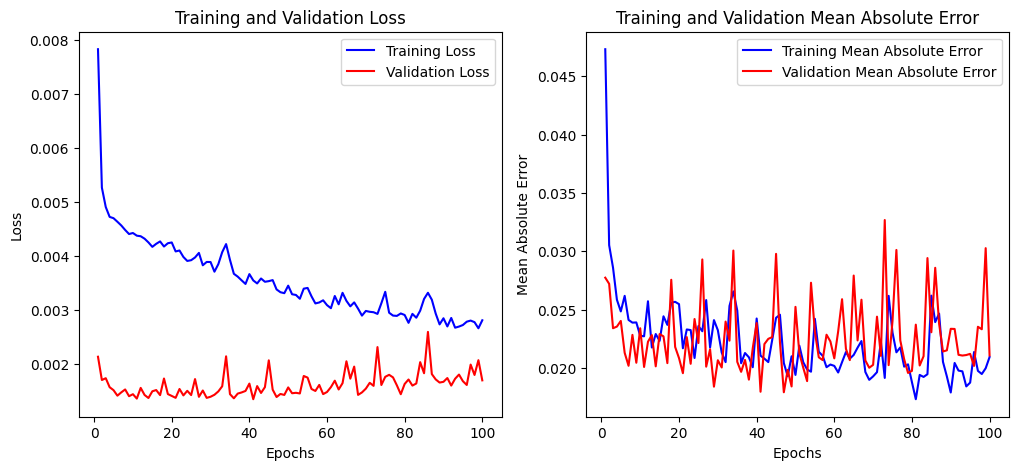

In [45]:
# Defining the model
inverse_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(8,), activation=tf.nn.relu),
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
optimizer = Adam(learning_rate=0.005)
inverse_model2.compile(optimizer=optimizer,
                       loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse2 = inverse_model2.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss7 = history_inverse2.history['loss']
val_loss7 = history_inverse2.history['val_loss']
metric7 = history_inverse2.history['mean_absolute_error']
val_metric7 = history_inverse2.history['val_mean_absolute_error']
epochs7 = range(1, len(loss7) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs7, loss7, 'b-', label='Training Loss')
plt.plot(epochs7, val_loss7, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs7, metric7, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs7, val_metric7, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [46]:
inverse_model2.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 11ms/step - loss: 5.6273e-04 - mean_absolute_error: 0.0151


[0.0005627349601127207, 0.015108509920537472]

## With Dropout layer

Epoch 1/100
13/13 [==============================] - 1s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.1909 - val_loss: 0.0152 - val_mean_absolute_error: 0.0927
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0269 - mean_absolute_error: 0.1183 - val_loss: 0.0098 - val_mean_absolute_error: 0.0811
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0216 - mean_absolute_error: 0.1057 - val_loss: 0.0058 - val_mean_absolute_error: 0.0553
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.0933 - val_loss: 0.0045 - val_mean_absolute_error: 0.0484
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0846 - val_loss: 0.0032 - val_mean_absolute_error: 0.0399
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0131 - mean_absolute_error: 0.0781 - val_loss: 0.0027 - val_mean_absolute_error: 0.0352
Epoch 7/100
13/13 [==

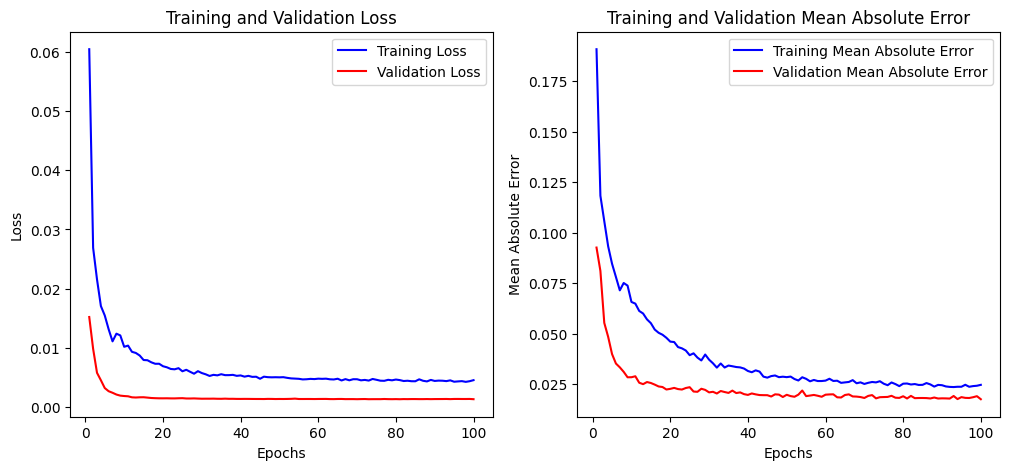

In [47]:
# Defining the model
inverse_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(8,), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3), # Adding a dropout layer with a 30% dropout rate
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
inverse_model3.compile(optimizer='adam',
                       loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse3 = inverse_model3.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss8 = history_inverse3.history['loss']
val_loss8 = history_inverse3.history['val_loss']
metric8 = history_inverse3.history['mean_absolute_error']
val_metric8 = history_inverse3.history['val_mean_absolute_error']
epochs8 = range(1, len(loss8) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs8, loss8, 'b-', label='Training Loss')
plt.plot(epochs8, val_loss8, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs8, metric8, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs8, val_metric8, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [48]:
inverse_model3.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 7ms/step - loss: 5.5985e-04 - mean_absolute_error: 0.0151


[0.0005598460556939244, 0.015102804638445377]

## With Additional Hidden Layer

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0940 - val_loss: 0.0086 - val_mean_absolute_error: 0.0805
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0471 - val_loss: 0.0025 - val_mean_absolute_error: 0.0287
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0280 - val_loss: 0.0019 - val_mean_absolute_error: 0.0282
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0270 - val_loss: 0.0016 - val_mean_absolute_error: 0.0205
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0213 - val_loss: 0.0016 - val_mean_absolute_error: 0.0207
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0241 - val_loss: 0.0014 - val_mean_absolute_error: 0.0192
Epoch 7/100
13/13 [==

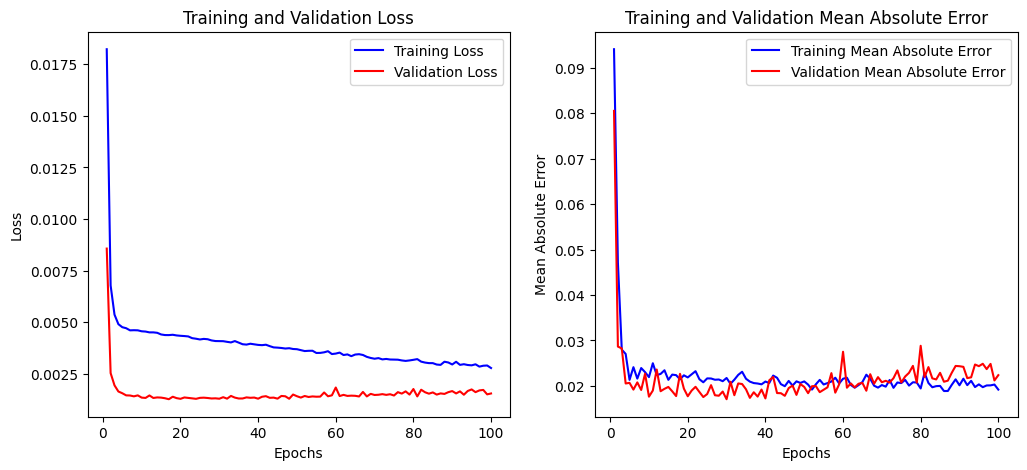

In [49]:
# Defining the model
inverse_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(75, input_shape=(8,), activation=tf.nn.relu),
    tf.keras.layers.Dense(75, activation=tf.nn.relu), # Adding an additional dense layer
    tf.keras.layers.Dense(2)  # No activation function or 'linear' for regression
])

# Compiling the model
inverse_model4.compile(optimizer='adam',
                       loss=tf.keras.losses.MeanSquaredError(),  # Change to a regression loss function
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use a regression metric

# Training the model with validation data
history_inverse4 = inverse_model4.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

# Plotting
loss9 = history_inverse4.history['loss']
val_loss9 = history_inverse4.history['val_loss']
metric9 = history_inverse4.history['mean_absolute_error']
val_metric9 = history_inverse4.history['val_mean_absolute_error']
epochs9 = range(1, len(loss9) + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs9, loss9, 'b-', label='Training Loss')
plt.plot(epochs9, val_loss9, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Metric
plt.subplot(1, 2, 2)
plt.plot(epochs9, metric9, 'b-', label='Training Mean Absolute Error')
plt.plot(epochs9, val_metric9, 'r-', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()



In [51]:
inverse_model4.evaluate(X_test2, y_test2)

2/2 [==============================] - 0s 10ms/step - loss: 4.3927e-04 - mean_absolute_error: 0.0156


[0.00043926711077801883, 0.015564405359327793]